# Beleg2 - Multivariate lineare Regression

### Finale Version zur Abgabe
Letzte Änderung: Diletta
<br/>Timestamp: Montag, 21.05.2018, h: 20.05


Implementieren Sie die multivariate lineare Regression mit Python und numpy in einem ipython notebook.
Hinweis: Ihre Lösung der multivariaten linearen Regression sollte auf numpy basieren und im Prinzip mit beliebig vielen Features zurechtkommen. D.h. es muss eine vektorielle Implementierung vorgenommen werden.

Benutzen Sie zur Lösung eine Kostenfunktion und das Gradientenabstiegsverfahren. Beachten Sie dabei folgende Punkte:

## Aufgabe 1: Erstellen Sie zuerst zum Testen Ihrer Lösung künstliche Datenwerte für zwei Merkmale (Features): 

#### X soll dabei eine Datenmatrix mit zwei Spalten sein, wobei die Werte zufällig aus einer Gleichverteilung (konstante Wahrscheinlichkeitsdichte in einem Intervall) gezogen werden.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


In [2]:
### Aufgabe 1
#Interval low-high
low = 0
high = 20
data = 100 #Anzahl der Datensätze
merkmale = 2 #Anzahl Spalten

#Creates a matrix with normal distributed values 
myX = np.random.uniform(low,high, (data,merkmale)) #Matrix mit 2 Spalten

original_X = myX.copy() #backup original matrix

#Inserts in matrix myX, at index 0, a vector of ones along axis 1
myX = np.insert(myX, 0, values=1, axis=1)
print("Matrix: ")
myX

Matrix: 


array([[  1.        ,   9.35062524,  11.49465639],
       [  1.        ,  13.06277385,   7.12501979],
       [  1.        ,  11.90867358,   8.67831977],
       [  1.        ,  10.81663549,   3.15170776],
       [  1.        ,   0.34479769,  19.9649227 ],
       [  1.        ,   8.26324817,  16.97122526],
       [  1.        ,   3.57735082,  10.61054123],
       [  1.        ,   0.1368466 ,   3.17554548],
       [  1.        ,   5.79374413,  17.97889384],
       [  1.        ,  18.23745033,   5.86617339],
       [  1.        ,  14.55019814,   7.68820313],
       [  1.        ,   1.04828424,   7.9191074 ],
       [  1.        ,   6.37686615,  16.96749165],
       [  1.        ,  11.44938013,   2.67361563],
       [  1.        ,  17.71472269,  19.85068139],
       [  1.        ,  14.48776896,   0.09073199],
       [  1.        ,   0.32603816,   9.52960719],
       [  1.        ,  17.61437255,   6.71691816],
       [  1.        ,   1.74164311,  19.3442868 ],
       [  1.        ,  16.36598

## Aufgabe 2: Implementieren Sie die Hypothese (lineares Modell) als Python Funktion: linear_hypothesis(theta)

#### Die Pythonfunktion soll dabei eine Funktion zurückgeben:

In [3]:
#calculates linear hypothesis
#Parameter: array of thetas

def linear_hypothesis(theta):
    return lambda X: X.dot(theta) #Function works for any given Matrix X

## Aufgabe 3: Generierung, Plotten und Feature Scaling

###  a) Nutzen Sie die Funktion linear_hypothesis(theta) zum Generieren künstlicher y-Werte (Zielwerte) für Ihre Merkmalsvektoren (Zeilen von X).  Addieren Sie zusätzich ein gaussches Rauschen auf die einzelnen y-Werte.

In [4]:
#theta array
theta = np.array([1., 1., 1.]) 

#call function linear_hypothesis
h = linear_hypothesis(theta)

#Creates y values with function linear_hypothesis
y = h(myX)

print("Y values without Gaussian error: ")
print(y) #len(y) == data

#Defining mu and sigma for gaussian error
mu = 0.0
sigma = 1.5 

#Adds a Gaussian error to the values
y = y + np.random.normal(mu, sigma, data)

print("\nY values with Gaussian error: ")
print(y)

Y values without Gaussian error: 
[ 21.84528164  21.18779364  21.58699335  14.96834325  21.30972039
  26.23447343  15.18789206   4.31239209  24.77263797  25.10362372
  23.23840128   9.96739164  24.3443578   15.12299576  38.56540408
  15.57850095  10.85564535  25.33129072  22.08592991  24.68775972
  23.68318983  36.32333124  34.65026867  13.91736261  15.38685532
  20.36445995  20.27084739  20.10610681  18.42824004  10.12699893
   9.80063112  23.64382525  19.12933141  26.24201044  37.17972699
  18.4039985   19.7231968   12.37145029  16.56556046  18.70234033
  20.21338941  19.21788867  24.34258379  11.92553299  24.90973839
  23.6557527   31.30011388  22.59806981   3.51365935  26.22495337
  28.97756086  16.77227873   4.42861584   3.49665838  25.12216959
  10.64802789  14.44865144  19.20934274  28.1774694   25.5173046
  28.85963921   7.80963064  26.95842264   7.53276319  28.43042779
  25.25662977  11.12170846  31.46737582  26.57727716  20.56329073
  17.07388792  27.30720122  20.39392601  29


### b) Stellen Sie die X1-X2-Y Werte in einem 3D Plot dar, siehe: http://matplotlib.org/mpl_toolkits/mplot3d/tutorial.html

Tutorial von O Really:
https://www.oreilly.com/learning/three-dimensional-plotting-in-matplotlib


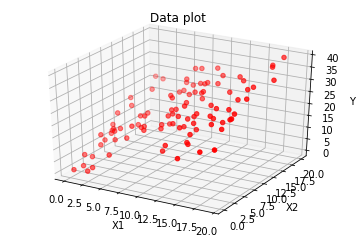

In [5]:
#Plotting    
x1 = myX[:,1]
x2 = myX[:,2]
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


ax.scatter(x1, x2, y, c='r', marker='o')

ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
plt.title("Data plot")
plt.show()

### c) Implementieren Sie das Feature Scaling um neue x' Werte zu berechnen

In [6]:
#The function receives a vector of values and scales them in a range 0-1
def feature_scale(vector):
    if(np.std(vector) != 0):
        vector = (vector-np.mean(vector))/np.std(vector)
    return vector


In [7]:
#scales a matrix 
def scale_matrix(X):
    #skips first column of ones
    #for i in range(1,merkmale+1):
        #col = X[:,i]
        #X[:,i] = feature_scale(col)
    X = np.apply_along_axis(feature_scale, 0, X)
    return X

In [8]:
myX = scale_matrix(myX)
myX

array([[ 1.        ,  0.08842061,  0.27725495],
       [ 1.        ,  0.74341253, -0.56170601],
       [ 1.        ,  0.53977673, -0.2634757 ],
       [ 1.        ,  0.34709152, -1.32457349],
       [ 1.        , -1.50061714,  1.90352812],
       [ 1.        , -0.10344218,  1.32874456],
       [ 1.        , -0.93024768,  0.10750672],
       [ 1.        , -1.53730917, -1.31999669],
       [ 1.        , -0.53917505,  1.52221479],
       [ 1.        ,  1.65646091, -0.80340184],
       [ 1.        ,  1.00586185, -0.453576  ],
       [ 1.        , -1.3764901 , -0.40924287],
       [ 1.        , -0.4362858 ,  1.32802771],
       [ 1.        ,  0.45873647, -1.41636616],
       [ 1.        ,  1.56422797,  1.88159403],
       [ 1.        ,  0.99484651, -1.91227434],
       [ 1.        , -1.50392717, -0.10003032],
       [ 1.        ,  1.54652164, -0.64006065],
       [ 1.        , -1.25415005,  1.78436734],
       [ 1.        ,  1.32624843, -0.52392855],
       [ 1.        , -0.44742452,  1.213

## Aufgabe 4: Implementieren Sie die Kostenfunktion J als Python Funktion: cost_function(x, y)
#### Die Pythonfunktion soll dabei eine Funktion zurückgeben, die die denParametervektor theta aufnimmt.
- j = cost_function(X, y) 
- print j(theta)
- 41.20 # Wert abhaengig von X und y


In [9]:
# Aufgabe 4
#given a matrix and hypothesis values (y values) calculate the cost function
def cost_function(X,y):
    m = data
    return lambda theta: 1./(2*m)*((linear_hypothesis(theta)(X)-y)**2).sum()


j = cost_function(myX,y) #y values not scaled
print(j(theta)) #theta=[1,1,1]

##### das ist die Kostenfuntkion mit skalierten y-Werten, mit theta=1,1,1 kommt 0.0 als Ergebnis raus!!!!!
#thetas = [1.2,2,4]
#jj = cost_function(myX,y_scaled)
#print(jj(thetas))

203.191529938


## Aufgabe 5: Implementieren Sie das Gradientenabstiegsverfahren unter Benutzung der Kostenfunktion und der linearen Hypothese.

## 5a) Schreiben Sie eine Funktion die die Update Rules anwendet zur Berechnung der neuen theta-Werte:
theta = compute_new_theta(x, y, theta, alpha)


In [10]:
def compute_new_theta(X,y,theta,alpha):
    m = data
    new_thetas = theta-alpha*(1.0/m)*np.dot(X.T,((linear_hypothesis(theta)(X))-y))
    return new_thetas

#Test method call with alpha 0.02 or 0.1
print(compute_new_theta(myX,y,theta, 0.02))    
print(compute_new_theta(myX,y,theta, 0.1))  

[ 1.37934328  1.09849366  1.09237602]
[ 2.89671641  1.49246828  1.46188012]


## 5b) Wählen Sie Startwerte in der Umgebung des Miniums der Kostenfunktion für theta. 
#Wenden Sie iterativ die compute_new_theta Funktion an und finden Sie so ein Theta mit niedrigen Kosten.
Kapseln Sie dies in eine Funktion:
gradient_descent(alpha, theta, nb_iterations, X, y)

In [11]:
def gradient_descent(alpha, theta, nb_iterations, X, y):
    #Stores costs for each iteration
    costs = [] #cost = np.zeros(nb_iterations)
       
    #stores changes in theta for each iteration
    temp_thetas = np.matrix(np.zeros(myX.shape))
    #print(temp_thetas)
    
    #starting cost value
    j = cost_function(X,y)(theta)
    
    costs.append(j)   
    
    #Iterates all nb_iterations
    for i in range(nb_iterations-1):
        #compute new thetas
        temp_thetas = compute_new_theta(X,y,theta,alpha)
        #update
        theta = temp_thetas
        #new cost function is computed   
        j = cost_function(X,y)
        cost = j(theta)
        #new cost appended
        costs.append(cost)

    return {'theta': theta, "costs": costs, "last": costs[len(costs)-1]}


In [12]:
iterations = 600
alpha = 0.01
theta = [0.,0.,0.]
gr1 = gradient_descent(alpha, theta, iterations, myX, y)
computed_theta = gr1['theta']
#print(gr1['costs'])#last cost

## 5c) Plotten Sie den Fortschritt (Verringerung der Kosten über den Iterationen) für 5b

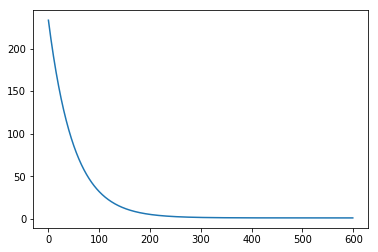

In [13]:
# Aufgabe 5c
import matplotlib.pyplot as plt
fig = plt.figure()
#ax = fig.add_subplot(111, projection='3d')
plt.plot(gr1['costs'])
plt.show()

# 6) Stellen Sie die gefundene Hyperebene in einem 3D Plot zusammen mit den Daten dar

In [17]:
#Retrieves column X1 and X2 from original matrix myX
X1 =myX[:,[1,]].flatten()#selection of all rows. Of each row then the first column
X2 =myX[:,[2,]].flatten()

#Creates a meshgrid of the matrix columns X1 and X2 
X1mesh, X2mesh = np.meshgrid(X1,X2)
matrixMeshed = np.column_stack((X1mesh.ravel(),X2mesh.ravel()))
matrixMeshed = np.insert(matrixMeshed, 0, values=1, axis=1) #füge 1 als erste Spalte ein

#Values for Z calculated with linear_hypothesis on the last computed thetas (gr1 above)
yvalues = np.apply_along_axis(linear_hypothesis(computed_theta), 1, matrixMeshed) 
yvalues = yvalues.reshape(X1mesh.shape) #yvalues gets the shape of X1mesh (data,data)


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

%matplotlib notebook
#ax.plot_wireframe(X1mesh, X2mesh, yvalues, rstride=4, cstride=4, alpha=0.4)
ax.plot_surface(X1mesh, X2mesh , yvalues, cmap='Oranges_r', alpha=0.01)
ax.scatter(X1,X2,y, c='r')
plt.title("3D Plot")
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('y')
plt.show()

ValueError: shapes (3,) and (101,) not aligned: 3 (dim 0) != 101 (dim 0)

## Test mit mehreren Features 

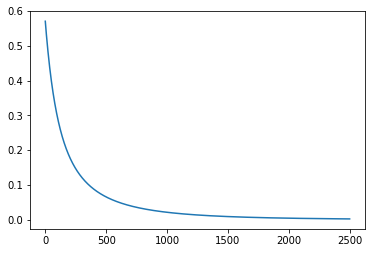

In [15]:
low = 0
high = 50
cols = 100 #features
row = 50
grossX = np.random.uniform(low,high, (row,cols))
grossX = np.insert(grossX, 0, values=1, axis=1)
#print(grossX)
thetas = np.ones(cols+1)
h = linear_hypothesis(thetas)
y_val = h(grossX)
y_val = y_val +np.random.normal(0, 1.5, row)

iterations = 2500
alpha = 0.00002
grr = gradient_descent(alpha, thetas, iterations, grossX, y_val)
computed_theta = grr['theta']

fig = plt.figure()
plt.plot(grr['costs'])
plt.show()